### Imports
Imports pandas and numpy for data manipulation. Uses matplotlib for plotting and SciKit Learn to produce synthetic data. We use SciPy to calculate the distance matrices.

In [166]:
import os
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.datasets import make_blobs
from scipy.spatial.distance import pdist, squareform
import statistics #mean and standard dev measurements
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=10,10 #configure plot size

os.chdir('/Users/jscearce/TTB_demo_data/')

### Column Names
Appends column names that contain common compounds found in spirits along with 90 possible additional ingredients.

In [167]:
# create column names for dataframe
column_names = []
column_names.append('type')
column_names.append('ethyl')
column_names.append('methonal')
column_names.append('glycerol')
column_names.append('propanol')
column_names.append('coumarin')
column_names.append('citric_acid')
column_names.append('acetaldehyde')
column_names.append('isoamyl_alcohol')
column_names.append('impurities')
for i in range(90):
    column_names.append('add_ingredient'+str(i))

### Synthetic Data
Produces a matrix of synthetic data with 100 features. Here we are producing 5 clusters with normalized values in each cluster ranging from 1-10. A random state is also added to ensure reproducibility. Each data point is placed into a pandas dataframe and the cluster label is mapped to a type of spirit.

In [168]:
# generate synthetic cluster dataset
X, y = make_blobs(n_samples=100, centers=5, n_features=100, center_box=(1,10), cluster_std=0.5, random_state=4534)

# turn synthetic data into dataframe and assign column names
df = pd.DataFrame(X,columns=column_names)
df['type'] = y

# map cluster labels to spirit names and assign a color palette 
column_mapping = {0:'vodka',1:'rum',2:'whiskey',3:'brandy',4:'gin'}
mkr_dict = {'vodka':'o', 'rum':'o', 'whiskey':'o', 'brandy':'o', 'gin':'o'}
colors = {'vodka':'blue', 'rum':'magenta', 'whiskey':'green', 'brandy':'yellow', 'gin':'brown'}
df.replace({"type": column_mapping},inplace=True)

### Plotting Clusters
Data is grouped by their type of spirit a plotted on a 2d graph

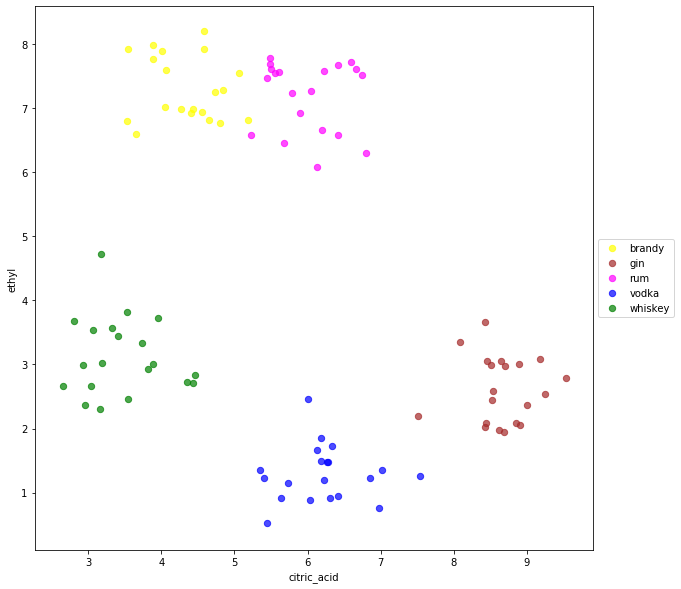

In [169]:
df = pd.read_csv('Synthetic_Formula_Data.csv')

# scatter plot, dots colored by type value
fig, ax = plt.subplots()
grouped = df.groupby('type')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='citric_acid', y='ethyl', label=key, color=colors[key], s=40, alpha=0.7, marker=mkr_dict[key])
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Fraudulent Data
A fraudulent data point is added under the label 'vodka_fraud.' This particular fraudulent entry is attempting to copy or steal the formula of an existing vodka on the market.

In [170]:
# read fraudulent csv and count the values of the types
fraud_df = pd.read_csv('Synthetic_Formula_Data_Fraud.csv')
display(fraud_df['type'].value_counts().to_frame())

,type
rum,20
gin,20
brandy,20
whiskey,20
vodka,19
vodka_fraud,1


### Plotting the Fraud
Below we see the fraudulent data point which is suspiciously close to an existing data point. How should we identify when a data point is too close to another data point?

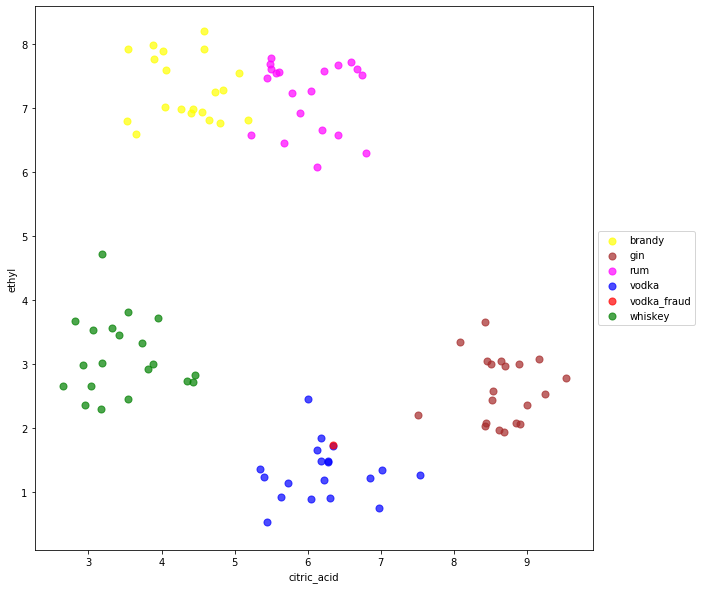

In [171]:
# scatter plot, dots colored by type value
mkr_dict = {'vodka':'o', 'vodka_fraud':'o', 'rum':'o', 'whiskey':'o', 'brandy':'o', 'gin':'o'}
colors = {'vodka':'blue', 'vodka_fraud':'red', 'rum':'magenta', 'whiskey':'green', 'brandy':'yellow', 'gin':'brown'}
fig, ax = plt.subplots()
grouped = fraud_df.groupby('type')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='citric_acid', y='ethyl', label=key, color=colors[key], s=50, alpha=0.7, marker=mkr_dict[key])
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Measuring the Distance
Measures the average distance between all data points within the 'vodka' cluster. We see a mean euclidean distance of 6-7 with a standard deviation around 1. This tells us that, on average, one particular vodka formula should differ from another by a euclidean difference of around 6. 

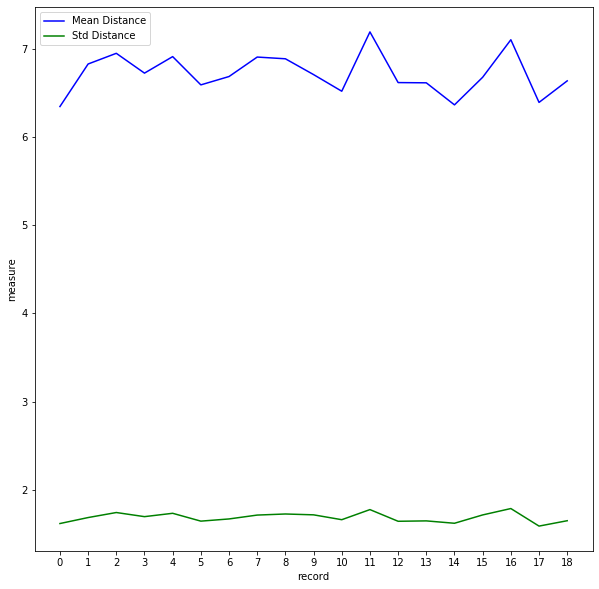

In [172]:
# drop uneccessary columns
only_vodka_df = fraud_df[fraud_df['type']=='vodka']
only_vodka_df.drop('type',axis=1,inplace=True)
only_vodka_df.drop('Unnamed: 0',axis=1,inplace=True)

# calculate the distance matrix between all values
distances = pdist(only_vodka_df.values, metric='euclidean')
dist_matrix_all = squareform(distances)

mean_dist = []
std_dist = []

# determine the mean and standard deviation of distance between each record
for row in dist_matrix_all:
    mean_dist.append(statistics.mean(row))
    std_dist.append(statistics.stdev(row))

# plot average distance between records and standard deviation 
xi=list(range(len(mean_dist)))
plt.plot(xi,mean_dist,'b',label='Mean Distance')
plt.plot(std_dist,'g',label='Std Distance')
plt.xlabel('record')
plt.ylabel('measure')
plt.xticks(xi)
plt.legend()
plt.show()

### Adding in the Fraud
Previously, we showed the distance of only legitimate vodka formulas. Now, we will add in the fraudulent entry to examine.

In [173]:
only_vodka_df_fraud = fraud_df[(fraud_df['type']=='vodka_fraud')]
only_vodka_df_fraud.drop('type',axis=1,inplace=True)
only_vodka_df_fraud.drop('Unnamed: 0',axis=1,inplace=True)
only_vodka_df_all = pd.concat([only_vodka_df,only_vodka_df_fraud])
feature_list = only_vodka_df_all.values.tolist()

### Showing the Fraud
To visually inspect the fraudulent entry we take a closer look at the legitimate formula and the formula which matches it very closely. When we calculate the distance between the legitimate and fraudulent formula we see that the Euclidean distance is significantly lower than average for the vodka cluster and this raises suspicion. 

,ethyl,methonal,glycerol,propanol,coumarin,citric_acid,acetaldehyde,isoamyl_alcohol,impurities,add_ingredient0,add_ingredient1,add_ingredient2,add_ingredient3,add_ingredient4,add_ingredient5,add_ingredient6,add_ingredient7,add_ingredient8,add_ingredient9,add_ingredient10,add_ingredient11,add_ingredient12,add_ingredient13,add_ingredient14,add_ingredient15,add_ingredient16,add_ingredient17,add_ingredient18,add_ingredient19,add_ingredient20,add_ingredient21,add_ingredient22,add_ingredient23,add_ingredient24,add_ingredient25,add_ingredient26,add_ingredient27,add_ingredient28,add_ingredient29,add_ingredient30,add_ingredient31,add_ingredient32,add_ingredient33,add_ingredient34,add_ingredient35,add_ingredient36,add_ingredient37,add_ingredient38,add_ingredient39,add_ingredient40,add_ingredient41,add_ingredient42,add_ingredient43,add_ingredient44,add_ingredient45,add_ingredient46,add_ingredient47,add_ingredient48,add_ingredient49,add_ingredient50,add_ingredient51,add_ingredient52,add_ingredient53,add_ingredient54,add_ingredient55,add_ingredient56,add_ingredient57,add_ingredient58,add_ingredient59,add_ingredient60,add_ingredient61,add_ingredient62,add_ingredient63,add_ingredient64,add_ingredient65,add_ingredient66,add_ingredient67,add_ingredient68,add_ingredient69,add_ingredient70,add_ingredient71,add_ingredient72,add_ingredient73,add_ingredient74,add_ingredient75,add_ingredient76,add_ingredient77,add_ingredient78,add_ingredient79,add_ingredient80,add_ingredient81,add_ingredient82,add_ingredient83,add_ingredient84,add_ingredient85,add_ingredient86,add_ingredient87,add_ingredient88,add_ingredient89
0,1.726963,6.672399,4.107726,9.068422,7.894694,6.341233,4.58668,3.771346,5.705287,4.910989,9.240842,5.60732,4.642988,6.581961,5.540353,7.431515,9.429696,4.657797,3.087487,6.201816,5.747094,6.767566,5.676859,6.769689,5.19514,3.965105,6.966474,2.005632,5.318162,4.353009,3.867341,2.96292,7.715566,2.242328,2.229222,7.139462,5.165068,7.645606,7.460824,3.212312,5.443687,6.191949,10.702343,9.284247,4.676533,3.258304,5.19325,4.646365,2.024731,6.927423,2.949483,3.986958,6.235565,3.661122,8.845903,4.841155,8.099787,2.592639,7.226402,4.875247,2.855799,3.096321,4.150443,4.634257,0.549293,10.015111,3.839015,6.149753,4.347078,6.876315,3.699107,0.635418,1.651968,5.482817,5.270089,3.028199,9.449424,9.751247,1.921698,3.132453,5.634719,9.705037,2.894349,3.984272,6.219549,7.843336,10.633569,3.48404,3.400678,4.833058,5.559638,9.090819,5.433402,3.418614,0.854904,8.191004,8.357922,9.320491,8.433781
0,1.736963,6.682399,4.117726,9.078422,7.904694,6.351233,4.59668,3.781346,5.715287,4.920989,9.250842,5.61732,4.652988,6.591961,5.550353,7.441515,9.429696,4.657797,3.087487,6.201816,5.747094,6.767566,5.676859,6.769689,5.19514,3.965105,6.966474,2.005632,5.318162,4.353009,3.867341,2.96292,7.715566,2.242328,2.229222,7.139462,5.165068,7.645606,7.460824,3.212312,5.443687,6.191949,10.702343,9.284247,4.676533,3.258304,5.19325,4.646365,2.024731,6.927423,2.949483,3.986958,6.235565,3.661122,8.845903,4.841155,8.099787,2.592639,7.226402,4.875247,2.855799,3.096321,4.150443,4.634257,0.549293,10.015111,3.839015,6.149753,4.347078,6.876315,3.699107,0.635418,1.651968,5.482817,5.270089,3.028199,9.449424,9.751247,1.921698,3.132453,5.634719,9.705037,2.894349,3.984272,6.219549,7.843336,10.633569,3.48404,3.400678,4.833058,5.559638,9.090819,5.433402,3.418614,0.854904,8.191004,8.357922,9.320491,8.433781


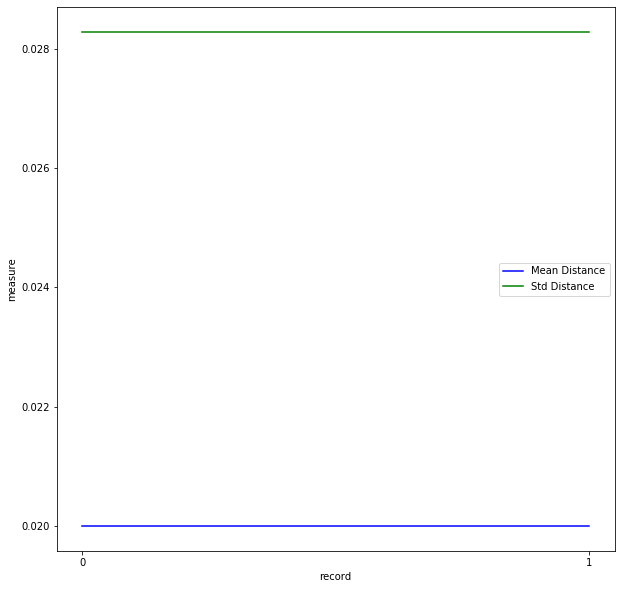

In [174]:
# pick out the fraudulent entry and the entry which it resembles closely
not_fraud = only_vodka_df_all.iloc[13]
fraud = only_vodka_df_all.iloc[19]

not_fraud = not_fraud.to_dict()
fraud = fraud.to_dict()

# create dataframe of the two entries to make analysis easier
example_df1 = pd.DataFrame(not_fraud,index=[0])
example_df2 = pd.DataFrame(fraud,index=[0])
example_df = pd.concat([example_df1,example_df2])
display(example_df.head())

# calculate the distance matrix between all values
distances = pdist(example_df.values, metric='euclidean')
dist_matrix_fraud = squareform(distances)

mean_dist = []
std_dist = []

# determine the mean and standard deviation of distance between each record
for row in dist_matrix_fraud:
    mean_dist.append(statistics.mean(row))
    std_dist.append(statistics.stdev(row))

# plot average distance between records and standard deviation 
xi=list(range(len(mean_dist)))
plt.plot(xi,mean_dist,'b',label='Mean Distance')
plt.plot(std_dist,'g',label='Std Distance')
plt.xlabel('record')
plt.ylabel('measure')
plt.xticks(xi)
plt.legend()
plt.show()

### Visual Inspection of Euclidean Distance
Create a distance matrix of all synthetic values and plot them using a network graph. Here we can see the clusters of spirits and see how the distance between formulas are somewhat similar. An outlier can be identified when a node is suspiciously close to an existing node in the network.

In [175]:
# drop uneccessary columns
drop_list = ['type','Unnamed: 0']
network_df = fraud_df

for column in network_df.columns:
    if column in drop_list:
        network_df.drop(column,axis=1,inplace=True)

# calculate the distance matrix between all values
distances = pdist(network_df.values, metric='euclidean')
dist_matrix_whole = squareform(distances)

# turn distance matrix into a readable form for the network library
dt = [('len', float)]
A = dist_matrix_whole
A = A.view(dt)

# create network graph
G = nx.from_numpy_matrix(A)
G = nx.convert_node_labels_to_integers(G, first_label=0, ordering='default')    

# draw network graph and assign node and edge colors
G = nx.drawing.nx_agraph.to_agraph(G)

G.node_attr.update(color="red", style="filled")
G.edge_attr.update(color="blue", width="1.0")

G.draw('out.png', format='png', prog='neato')